# Aprendizado de Máquina


O machine learning (ML)  é uma subcategoria de inteligência artificial que se refere ao processo pelo qual os computadores desenvolvem o reconhecimento de padrões ou a capacidade de aprender continuamente ou fazer previsões com base em dados.

## Aprendizado não supervisionado

Caracterizado pela não existência de um agente externo indicando a resposta desejada para os padrões de entrada e têm por objetivo agrupas os dados fornecidos. Por exemplo os algoritmos de agrupamento.


<img src="Não supervisionado.jpg" style=width:500px;height:400px/>

## Aprendizado supervisionado

Caracterizado pela existência de um agente externo indicando a resposta desejada para os padrões de entrada e têm por objetivo ser capaz de classificar dados futuros. Ao utilizarmos aprendizado supervisionado, dividimos nosso dataset em dados de treino e dados de teste, geralmente numa proporção de 80% para treino e 20% para teste. Como exemplo podemos citar os algoritmos de regressão e classificação.


<img src="Supervisionado.jpg" style=width:500px;height:400px/>

### Algoritmos de classificação

Como o próprio nome sugere, são algoritmos criados visando classificar futuros dados utilizando de um treinamento prévio que pode ser feito utilizando diferentes métodos. Na aula de hoje veremos 3 deles, que são:

#### K-Vizinhos mais próximos (K-nearest neighbours)

Algoritmo baseado na distância entre o ponto que queremos classificar e seus vizinhos. Pode ter diferentes resultados se variarmos os valores de k, como podemos ver na imagem. (A biblioteca sklearn usa um padrão de k=5 vizinhos).

<img src="knn.jpg" style=width:500px;height:400px/>

#### Árvore de decisão (Decision Tree)

Como o próprio nome sugere, o algoritmo é inspirado em uma árvore de decisão, e com base em uma sequência de escolhas, chega em um resultado. Para exemplificar temos abaixo uma árvore mostrando uma decisão do que fazer em um dia de folga.

<img src="arvore.jpg" style=width:500px;height:400px/>

#### Floresta aleatória (Random forest)

O algoritmo de florestas aleatórias cria várias árvores de decisão e as combina para obter uma predição com maior acurácia e mais estável.

<img src="floresta.jpg" style=width:500px;height:400px/>

## Apresentação do problema

Na aula de hoje utilizaremos de um dataset chamado íris que contém diversas amostras de flores, e treinaremos um algoritmo para que saiba definir de qual tipo de íris se trata.

Primeiro vamos dar uma passada em alguns termos que são importantes e bastante usados em machine learning:
    
    Samples(amostras): Representa cada uma das amostras recolhidas (cada uma das linhas da tabela);
    Features: Representa cada um dos atributos (variáveis) das amostras (cada coluna de uma tabela);
    Target: É a classificação relacionada a cada uma das amostras.

<img src="tabela.jpg" style=width:500px;height:400px/>

### Importando bibliotecas

In [26]:
### Análise de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Criação do modelo
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 

### Avaliação de métricas
from sklearn.metrics import accuracy_score

### Leitura dos dados

In [27]:


###importando no google collab

#import io

#from google.colab import files
#uploaded = files.upload()

#data = pd.read_csv(io.BytesIO(uploaded['iris.csv']))
#data.head()

data = pd.read_csv("iris.csv")
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Análise exploratória

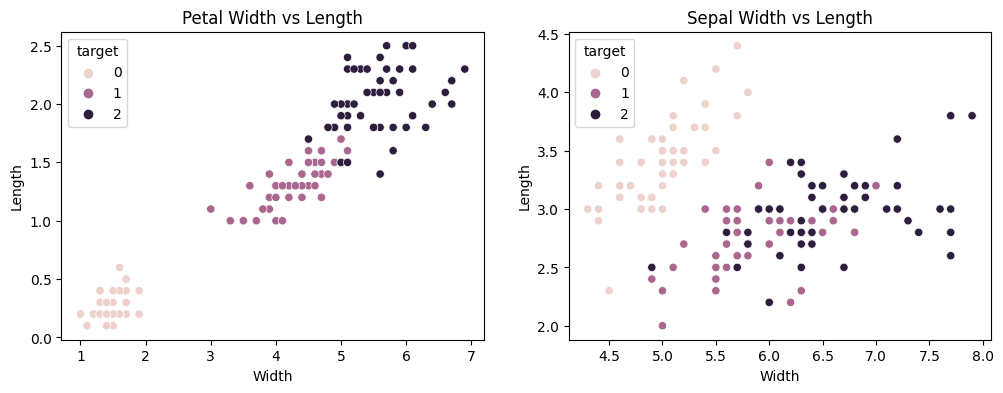

In [28]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.scatterplot(data = data, x = "petal length (cm)", y = "petal width (cm)", hue = "target")
plt.title("Petal Width vs Length")
plt.xlabel("Width")
plt.ylabel("Length")

plt.subplot(1,2,2)
sns.scatterplot(data = data, x = "sepal length (cm)", y = "sepal width (cm)", hue = "target")
plt.title("Sepal Width vs Length")
plt.xlabel("Width")
plt.ylabel("Length")

plt.show()

### Definição do modelo e treino

In [29]:
# instanciando modelos
tree = DecisionTreeClassifier()

kn = KNeighborsClassifier()

random_f = RandomForestClassifier()

In [30]:
# Separando dados
## Variáveis preditoras
X = data.loc[:,["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]]
X = np.array(X)

## Variável alvo
y = data["target"]
y = np.array(y)

## Separando treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0 )

print(f"Tamanho x treino: {X_train.shape}")
print(f"Tamanho x teste: {X_test.shape}")
print(f"Tamanho y teste: {y_test.shape}")
print(f"Tamanho y treino: {y_train.shape}")


Tamanho x treino: (120, 4)
Tamanho x teste: (30, 4)
Tamanho y teste: (30,)
Tamanho y treino: (120,)


In [31]:
# Treinando modelos
kn.fit(X_train, y_train)
random_f.fit(X_train, y_train)
tree.fit(X_train, y_train)

DecisionTreeClassifier()

### Testando e avaliando modelos

In [32]:
# Prevendo valores
tree_predict = tree.predict (X_test)
rf_predict = random_f.predict(X_test)
kn_predict = kn.predict(X_test)

In [33]:
# Avaliação

tree_score = accuracy_score(y_test, tree_predict)
rf_score = accuracy_score(y_test, rf_predict)
kn_score = accuracy_score(y_test, kn_predict)

print (f"Pontuação Decision tree:{tree_score}")
print (f"Pontuação Random forest:{rf_score}")
print (f"Pontuação Knn:{kn_score}")


Pontuação Decision tree:1.0
Pontuação Random forest:1.0
Pontuação Knn:0.9666666666666667


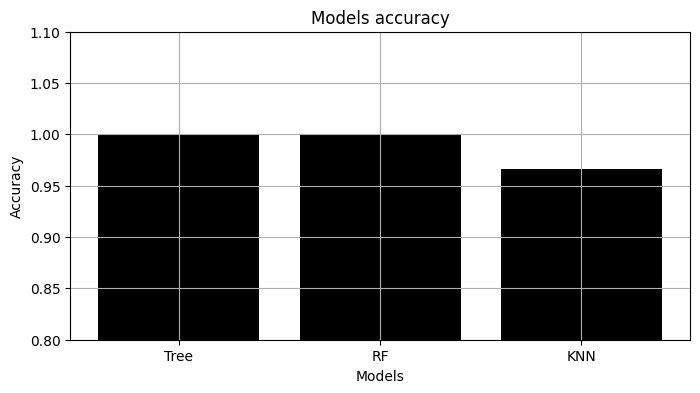

In [34]:
# Plotando resultados
plt.figure(figsize = (8,4))
plt.title("Models accuracy")
plt.bar(x = [0,1,2], height = [tree_score, rf_score, kn_score], color = "black")
plt.xticks([0,1,2], ["Tree","RF", "KNN"])
plt.ylim(0.8,1.1)
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.grid()
plt.show()